# Exploration des données simulées


<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Exploration-des-données-simulées" data-toc-modified-id="Exploration-des-données-simulées-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Exploration des données simulées</a></span><ul class="toc-item"><li><span><a href="#Préparation-de-l'environnement-pour-l'utilisation" data-toc-modified-id="Préparation-de-l'environnement-pour-l'utilisation-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Préparation de l'environnement pour l'utilisation</a></span></li></ul></li><li><span><a href="#Exploration-de-données" data-toc-modified-id="Exploration-de-données-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Exploration de données</a></span><ul class="toc-item"><li><span><a href="#Statistiques-descriptives" data-toc-modified-id="Statistiques-descriptives-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Statistiques descriptives</a></span></li></ul></li><li><span><a href="#Graphiques" data-toc-modified-id="Graphiques-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Graphiques</a></span><ul class="toc-item"><li><span><a href="#Cartes-de-fréquentation" data-toc-modified-id="Cartes-de-fréquentation-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Cartes de fréquentation</a></span></li><li><span><a href="#Distribution-des-données" data-toc-modified-id="Distribution-des-données-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Distribution des données</a></span></li><li><span><a href="#Trajectoire-des-lignes" data-toc-modified-id="Trajectoire-des-lignes-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Trajectoire des lignes</a></span></li><li><span><a href="#Autocorrélation" data-toc-modified-id="Autocorrélation-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Autocorrélation</a></span></li><li><span><a href="#Corrélations-spatiales" data-toc-modified-id="Corrélations-spatiales-3.5"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>Corrélations spatiales</a></span></li><li><span><a href="#Graph-cluster-des-corrélations-spatiales" data-toc-modified-id="Graph-cluster-des-corrélations-spatiales-3.6"><span class="toc-item-num">3.6&nbsp;&nbsp;</span>Graph cluster des corrélations spatiales</a></span></li></ul></li></ul></div>

## Préparation de l'environnement pour l'utilisation

In [1]:
# Chargement des librairies
import os
import random

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy
import scipy.io as sio
import seaborn as sns
import statsmodels.api as sm
from scipy.stats import iqr
#from scipy import stats
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.stattools import acf

In [2]:
os.chdir(r"./")

dossier_donnees = "data"
dossier_fichier = "simulation_simple"
nom_fichier = "SimSimple"

ch_fichier_donnees = os.path.join(dossier_donnees, dossier_fichier, nom_fichier)
matrice = sio.loadmat(ch_fichier_donnees)["mat"]

nom_fichier = "SimSimple_U"

ch_fichier_donnees = os.path.join(dossier_donnees, dossier_fichier, nom_fichier)
matrice_u = sio.loadmat(ch_fichier_donnees)["mat"]

nom_fichier = "SimSimple_X"

ch_fichier_donnees = os.path.join(dossier_donnees, dossier_fichier, nom_fichier)
matrice_v = sio.loadmat(ch_fichier_donnees)["mat"]

# Exploration de données

## Statistiques descriptives

In [3]:
def stats_matrice(matrice):
    lignes, colonnes = matrice.shape
    median = np.median(matrice)
    minimum = matrice.min()
    maximum = matrice.max()
    p25 = np.percentile(matrice, 25)
    p50 = np.percentile(matrice, 50)
    p75 = np.percentile(matrice, 75)
    var = matrice.var()
    std = matrice.std()
    intervalle = matrice.ptp()
    inquart = iqr(matrice)
    mean = np.mean(matrice)

    # Manquants
    nb_zeros = len(np.where(matrice == 0)[0])
    nb_nan = np.sum(np.isnan(matrice))

    nb_observations = lignes * colonnes
    prop_zeros = nb_zeros / nb_observations
    prop_nan = nb_nan / nb_observations

    ## Par lignes
    manquants_lignes = (matrice == 0).sum(1)
    lignes_max = manquants_lignes.max()
    lignes_min = manquants_lignes.min()
    lignes_mean = manquants_lignes.mean()
    descStats = dict(lignes=lignes,
                     colonnes=colonnes,
                     observations=nb_observations,
                     median=median,
                     minimum=minimum,
                     maximum=maximum,
                     p25=p25,
                     p50=p50,
                     p75=p75,
                     var=var,
                     std=std,
                     intervalle=intervalle,
                     inquart=inquart,
                     nb_manquants0=nb_zeros,
                     nb_manquantsNaN=nb_nan,
                     prop_manquants0=prop_zeros,
                     prop_manquantsNaN=prop_nan,
                     lignes_max=lignes_max,
                     lignes_min=lignes_min,
                     lignes_mean=lignes_mean,
                     mean=mean)
    print(pd.DataFrame(descStats, index=[0]).transpose())

In [4]:
stats_matrice(matrice)

                              0
lignes               100.000000
colonnes             123.000000
observations       12300.000000
median               318.930843
minimum              240.849270
maximum              403.944510
p25                  302.914041
p50                  318.930843
p75                  335.405416
var                  569.443824
std                   23.863022
intervalle           163.095240
inquart               32.491375
nb_manquants0          0.000000
nb_manquantsNaN        0.000000
prop_manquants0        0.000000
prop_manquantsNaN      0.000000
lignes_max             0.000000
lignes_min             0.000000
lignes_mean            0.000000
mean                 319.378372


In [5]:
stats_matrice(matrice_u)

                             0
lignes              100.000000
colonnes             20.000000
observations       2000.000000
median                3.945782
minimum               0.531930
maximum               7.702897
p25                   3.322545
p50                   3.945782
p75                   4.657749
var                   1.042950
std                   1.021249
intervalle            7.170967
inquart               1.335204
nb_manquants0         0.000000
nb_manquantsNaN       0.000000
prop_manquants0       0.000000
prop_manquantsNaN     0.000000
lignes_max            0.000000
lignes_min            0.000000
lignes_mean           0.000000
mean                  3.987519


In [6]:
stats_matrice(matrice_v)

                             0
lignes               20.000000
colonnes            123.000000
observations       2460.000000
median                4.020215
minimum               0.704824
maximum               7.775160
p25                   3.272701
p50                   4.020215
p75                   4.723910
var                   1.087972
std                   1.043059
intervalle            7.070337
inquart               1.451210
nb_manquants0         0.000000
nb_manquantsNaN       0.000000
prop_manquants0       0.000000
prop_manquantsNaN     0.000000
lignes_max            0.000000
lignes_min            0.000000
lignes_mean           0.000000
mean                  4.005160


# Graphiques

## Cartes de fréquentation

In [7]:
def heatmap(matrice, matrice_type,  height, width, cbar=True, palette="icefire"):
    cmin = np.min(matrice)
    cmax = np.max(matrice)
    cmid = ((cmax + cmin) / 2)

    fig, ax = plt.subplots(figsize=(height, width))

    ax = sns.heatmap(matrice,
                     xticklabels=100,
                     yticklabels=5,
                     cbar=cbar,
                     cmap=palette,
                     center=cmid)
    ax.set_title(
        "Carte de fréquence de la matrice {:}".format(matrice_type))

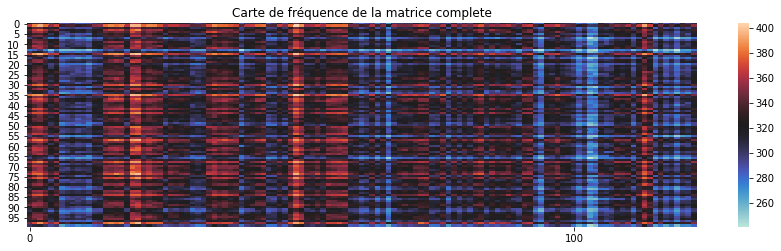

In [8]:
heatmap(matrice, matrice_type = "complete", height = 15, width = 15/4)

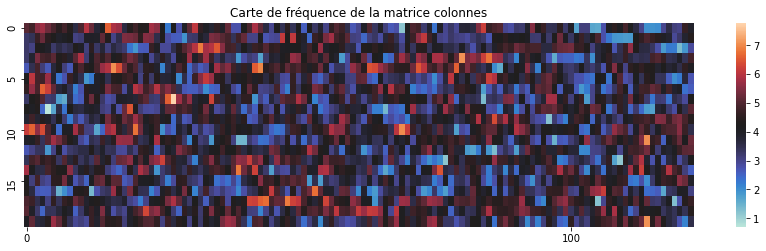

In [9]:
heatmap(matrice_v, matrice_type = "colonnes",height = 15, width = 15/4)

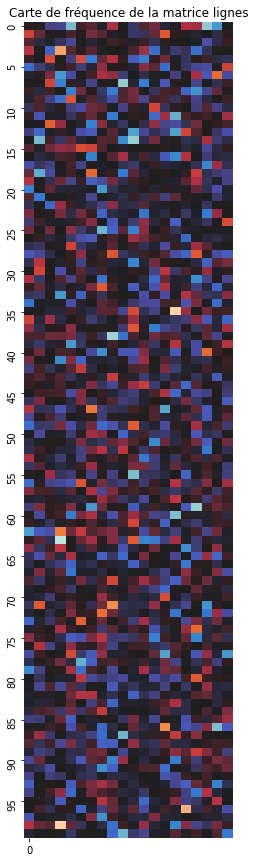

In [10]:
heatmap(matrice_u, matrice_type = "lignes",height = 15/4, width = 15, cbar = False)

## Distribution des données

In [11]:
def distribution(matrice, nom_matrice):
    sns.set_palette("tab10")
    fig, axes = plt.subplots(2,
                         1,
                         figsize=(15, 15 / 4),
                         sharex=True,
                         gridspec_kw={'height_ratios': [10, 1]})
    ax1, ax2 = axes[0], axes[1]
    sns.distplot(matrice, ax=ax1)
    sns.boxplot(matrice, ax=ax2)
    fig.suptitle(
    'Distribution des valeurs de la matrice {:}'.format(nom_matrice))

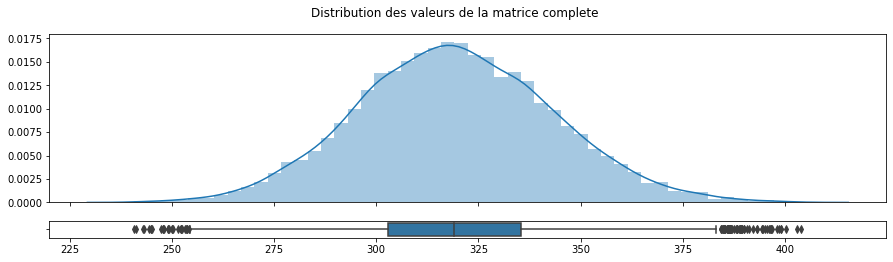

In [12]:
distribution(matrice, nom_matrice = "complete")

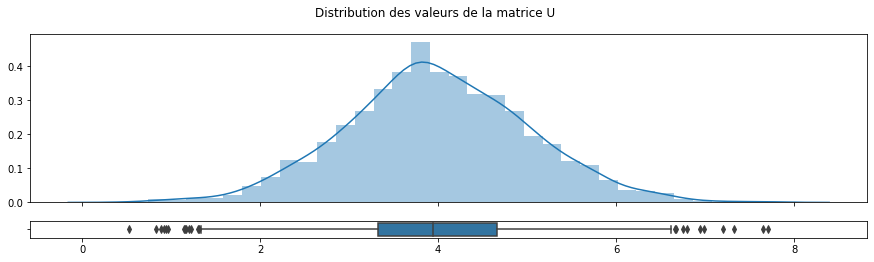

In [13]:
distribution(matrice_u, nom_matrice = "U")

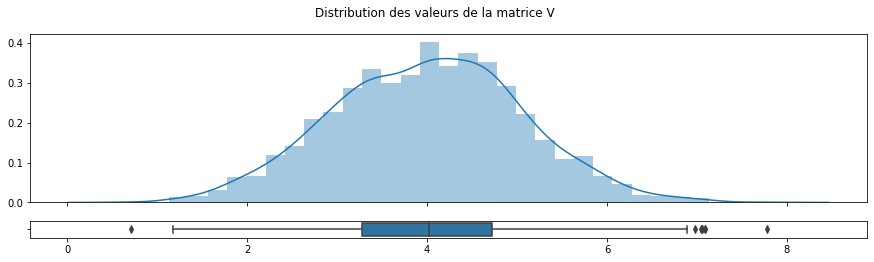

In [14]:
distribution(matrice_v, nom_matrice = "V")

## Trajectoire des lignes

In [15]:
def courbes_series(matrice):
    df = pd.DataFrame(matrice).transpose()
    dim1, dim2 = df.shape

    fig, axs = plt.subplots(3, 3, figsize=(20, 10), sharey=True, sharex=True)

    random.seed(2020)
    random_x = random.sample(range(dim2), 10)
    random_x = iter(random_x)
    palette = plt.get_cmap('tab20c')
    num_palette = iter(range(9))

    for i, axe in enumerate(axs):
        for j, ax in enumerate(axe):
            num = next(random_x)
            for v in df:
                sns.lineplot(x=range(dim1),
                             y=df[v],
                             marker="",
                             legend=None,
                             ax=ax,
                             color="grey",
                             linewidth=0.6,
                             alpha=0.3)
            sns.lineplot(range(dim1),
                         df[num],
                         marker='',
                         linewidth=2.4,
                         alpha=0.9,
                         color=palette(next(num_palette)),
                         ax=ax)
            ax.set_title("Station {:}".format(num))
            ax.set_ylabel('Volume de passagers')
    fig.suptitle(
        "Illustration de 9 stations choisies au hasard dans les données simulées",
        fontsize=16,
        y=1)

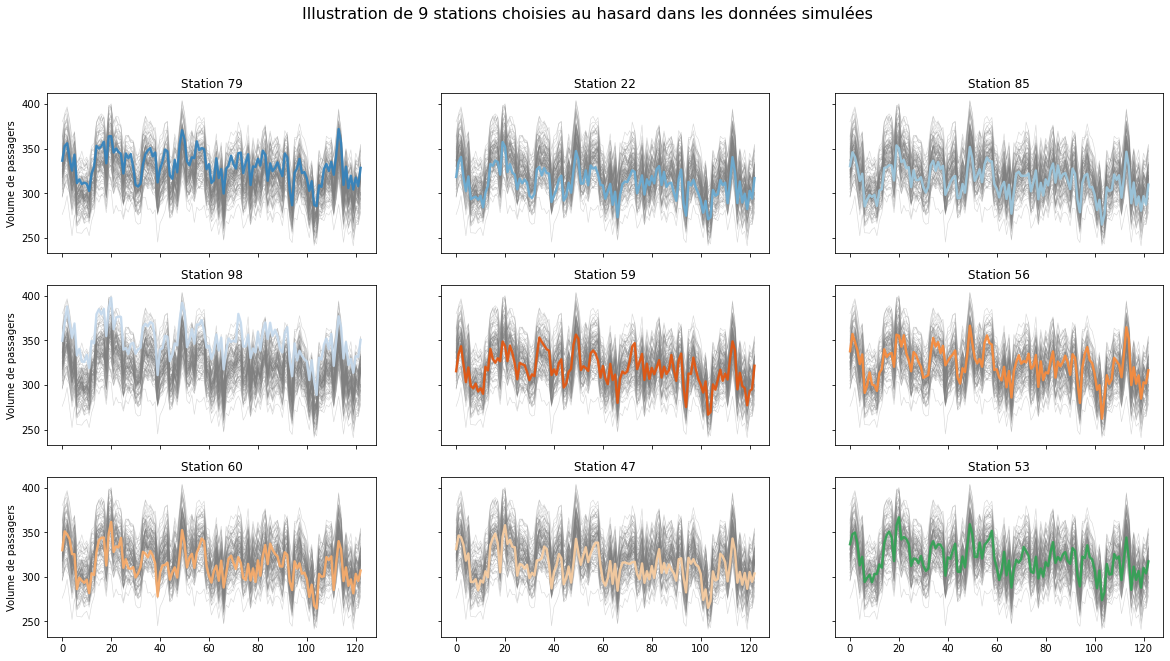

In [16]:
courbes_series(matrice)

## Autocorrélation

In [17]:
def graph_autocorrelation(matrice):
    height_size = 14
    width_size = 14 / 3

    sns.set_palette("tab10")

    fig, axes = plt.subplots(3,
                             1,
                             figsize=(height_size, width_size),
                             sharex=True,
                             sharey=True)
    ax1, ax2, ax3 = axes[0], axes[1], axes[2]
    dim1, dim2 = matrice.shape

    mi_dim = np.int(dim1 / 2)
    plot_acf(matrice[0], alpha=0.05, ax=ax1, title="")
    plot_acf(matrice[mi_dim], alpha=0.05, ax=ax2, title="")
    plot_acf(matrice[dim1 - 1], alpha=0.05, ax=ax3, title="")
    ax1.grid(True)
    ax2.grid(True)
    ax3.grid(True)

    rows = [
        'Ligne {:}'.format(row)
        for row in ['{:}'.format(1), '{:}'.format(mi_dim), '{:}'.format(dim1)]
    ]
    pad = 5  # in points
    for ax, row in zip(axes, rows):
        ax.annotate(row,
                    xy=(0, 0.5),
                    xytext=(-ax.yaxis.labelpad - pad, 0),
                    xycoords=ax.yaxis.label,
                    textcoords='offset points',
                    size='large',
                    ha='right',
                    va='center',
                    rotation=90)

    fig.suptitle(
        "Autocorrélations des séries temporelles (stations) du métro de Hangzhou"
    )

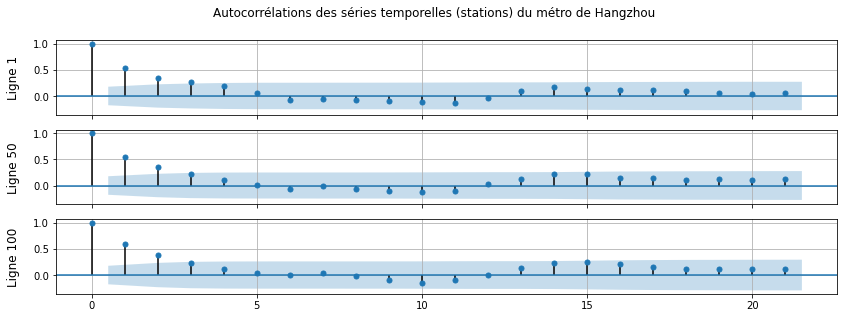

In [18]:
graph_autocorrelation(matrice)

## Corrélations spatiales

In [19]:
corr_p, p_matrix = scipy.stats.spearmanr(matrice.T, axis = 0)

In [20]:
# Masque pour que la partie inférieure soit 
mask_matrix = p_matrix.copy()
mask_matrix[np.where(mask_matrix > 0.05)] = 100
mask_matrix[np.where(mask_matrix < 0.05)] = 1
mask_matrix[np.where(mask_matrix == 100)] = 0
mask = np.zeros_like(corr_p)
mask[np.triu_indices_from(mask)] = True
mask[np.where(mask_matrix == 0)] = 1

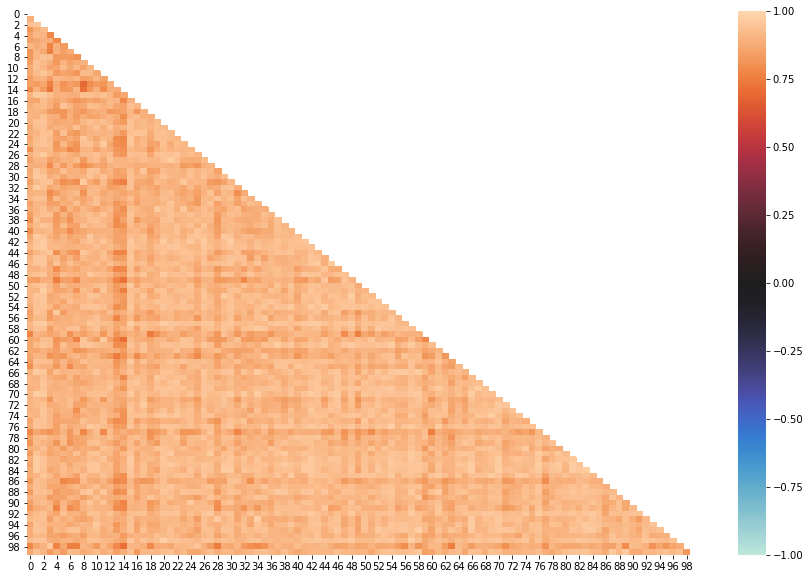

In [21]:
v_min = -1
v_max = 1

fig, ax = plt.subplots(1, 1, figsize=(15, 10))
sns.heatmap(corr_p,
            mask=mask,
            annot_kws={"size": 10},
            cmap="icefire",
            cbar_kws=dict(ticks=[1, .75, 0.5, 0.25, 0, -1, -.75, -0.5, -0.25]),
            vmin=v_min,
            vmax=v_max,
            ax=ax)

## Graph cluster des corrélations spatiales

C:\Users\amass\AppData\Roaming\Python\Python37\site-packages\seaborn\matrix.py:649: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


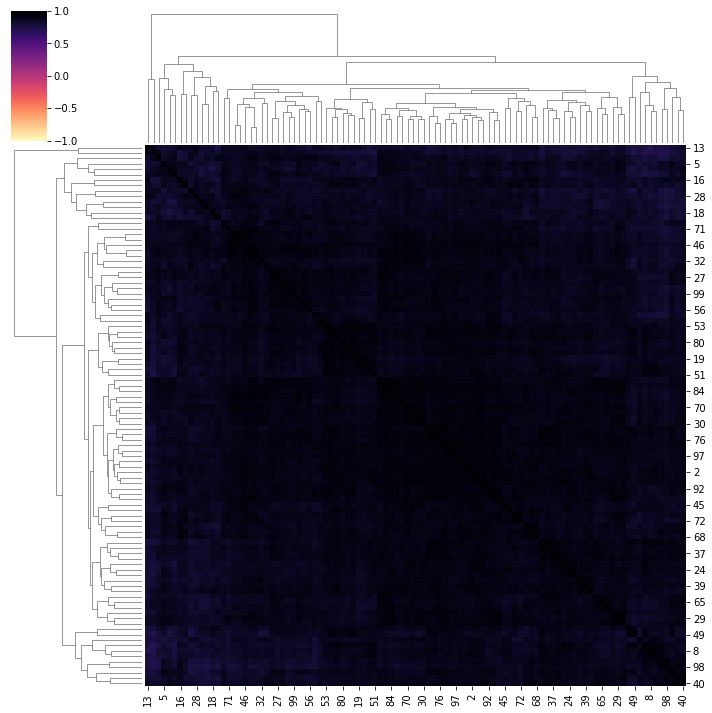

In [22]:
g = sns.clustermap(corr_p,
               row_cluster=True,
               col_cluster=True,
               vmin=v_min,
               vmax=v_max,
               cmap="magma_r")